# Explore here

In [1]:
# Your code here
import pandas as pd

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [ ]:
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df_raw.to_csv('../data/raw/df_raw.csv')

In [4]:
df = df_raw[['Latitude', 'Longitude', 'MedInc']]

In [5]:
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df,test_size=0.2,random_state=42)

In [7]:
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [8]:
from sklearn.cluster import KMeans

model =  KMeans(n_clusters=6, random_state=42)

X_train['cluster'] = model.fit_predict(X_train)

In [9]:
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


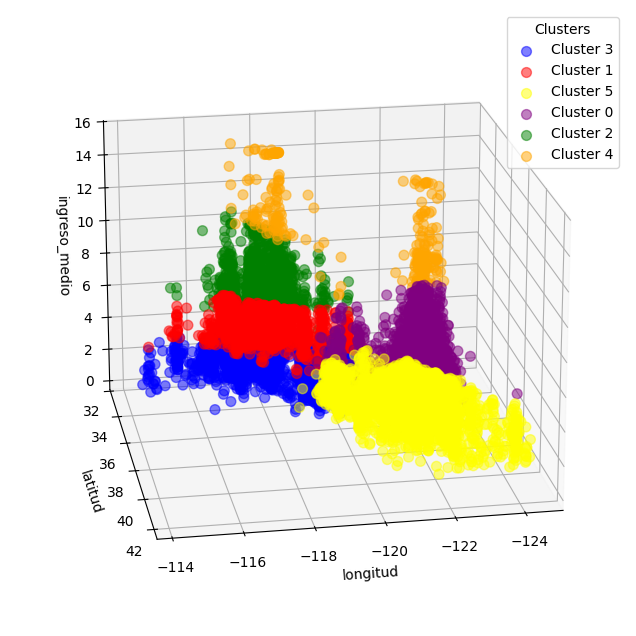

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax =  fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'yellow', 'purple', 'green', 'orange']

for i, color in zip (X_train['cluster'].unique(), colors):
    subset = X_train[X_train['cluster']==i]
    ax.scatter(subset['Longitude'], subset['Latitude'], subset['MedInc'], s=50, alpha=0.5, marker='o', c=[color], label=f'Cluster {i}')

ax.view_init(elev=20,azim=80)
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')
ax.set_zlabel('ingreso_medio')
ax.legend(title='Clusters')

plt.show()

In [11]:
X_test['cluster'] = model.predict(X_test)

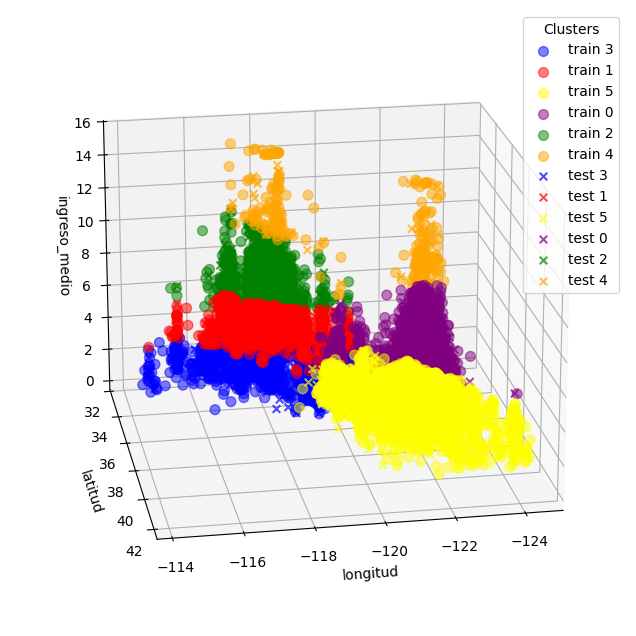

In [12]:
fig = plt.figure(figsize=(10,8))
ax =  fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'yellow', 'purple', 'green', 'orange']

for i, color in zip (X_train['cluster'].unique(), colors):
    subset = X_train[X_train['cluster']==i]
    ax.scatter(subset['Longitude'], subset['Latitude'], subset['MedInc'], s=50, alpha=0.5, marker='o', c=[color], label=f'train {i}')

for i, color in zip (X_train['cluster'].unique(), colors):
    subset = X_test[X_test['cluster']==i]
    ax.scatter(subset['Longitude'], subset['Latitude'], subset['MedInc'], s=30, alpha=0.7, marker='x', c=[color], label=f'test {i}')

ax.view_init(elev=20,azim=80)
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')
ax.set_zlabel('ingreso_medio')
ax.legend(title='Clusters')

In [13]:
y_train, y_test =  X_train['cluster'], X_test['cluster']
X_train.drop('cluster', axis=1, inplace=True)
X_test.drop('cluster', axis=1, inplace=True)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_forest = RandomForestClassifier(random_state=42)

model_tree.fit(X_train, y_train)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_tree = model_tree.predict(X_test)
y_forest = model_forest.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

print(f' acc_tree = {accuracy_score(y_tree, y_test)}')
print(f'acc_forest = {accuracy_score(y_forest, y_test)}')

 acc_tree = 0.9941860465116279
acc_forest = 0.9956395348837209


In [20]:
from pickle import dump

dump(model, open('../models/KMeans_model.sav', 'wb'))
dump(model_tree, open('../models/tree_decission_model.sav', 'wb'))
dump(model_forest, open('../models/random_forest_model.sav', 'wb'))